# **LAB ASSIGNMENT 4**

Submitted By: Arundhuti Chakraborty

# Importing The Files

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# Importing Neccesary Pacakages

In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras import datasets, layers, models, callbacks
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/train.csv")
test=pd.read_csv("/content/drive/MyDrive/Gender_Classification/test_fkwGUNG (1).csv")

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196 entries, 0 to 12195
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  12196 non-null  object
 1   class        12196 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 190.7+ KB


In [ ]:
train['class'].value_counts()

1    6174
0    6022
Name: class, dtype: int64

In [ ]:
image_dir="/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images"

# Preprocessing

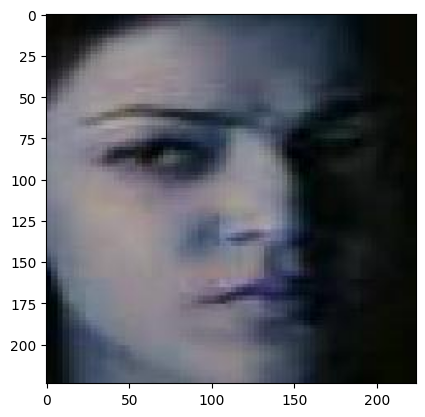

In [ ]:
im = cv2.imread("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images/1234.jpg")
im2 = cv2.imread("/content/drive/MyDrive/Gender_Classification/train_nLPp5K8 (1)/images/66.jpg")

plt.imshow(im)

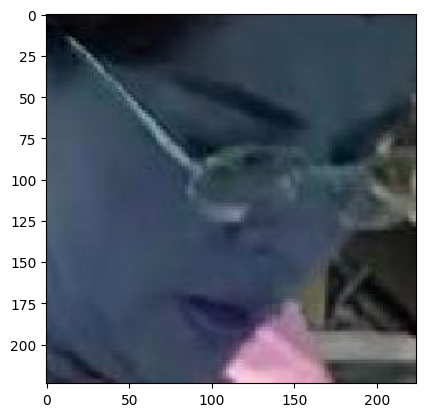

In [ ]:
plt.imshow(im2)

In [ ]:
# Convert the "class" column to string type
train['class'] = train['class'].astype(str)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,   # Randomly shift images vertically by up to 20% of the height
    horizontal_flip=True,     # Randomly flip images horizontally
    vertical_flip=True,       # Randomly flip images vertically
    brightness_range=[0.8, 1.2],  # Randomly adjust brightness
    zoom_range=[0.8, 1.2],   # Randomly zoom in or out
    shear_range=0.2,          # Randomly apply shear transformations
    fill_mode='nearest'       # Fill in missing pixels using the nearest neighbor strategy
)
batch_size=32

In [ ]:
traingen = datagen.flow_from_dataframe(
    dataframe=train[:9756],
    directory=image_dir,
    x_col='image_names',
    y_col='class',
    class_mode='binary',
    batch_size=batch_size,
    target_size=(32, 32)
)

Found 9756 validated image filenames belonging to 2 classes.


In [ ]:
valgen = datagen.flow_from_dataframe(
    dataframe=train[9756:],
    directory=image_dir,
    x_col='image_names',
    y_col='class',
    class_mode='binary',
    batch_size=50,
    target_size=(32, 32)
)


Found 2440 validated image filenames belonging to 2 classes.


In [ ]:
trainsample = next(traingen)
print("Dimensions of training sample", trainsample[0].shape)

Dimensions of training sample (32, 32, 32, 3)


In [ ]:
valsample = next(valgen)
print("Dimensions of validation sample",valsample[0].shape)

Dimensions of validation sample (50, 32, 32, 3)


In [ ]:
num_train_samples = traingen.samples
num_val_samples = valgen.samples

print("Number of training samples", num_train_samples)
print("Number of validation samples", num_val_samples)

Number of training samples 9756
Number of validation samples 2440


# Model Fitting

In [ ]:
model = Sequential()

# Convolutional Layer 1 with Batch Normalization
model.add(tf.keras.layers.Conv2D(16, (3,3), input_shape=(32, 32, 3), padding="same"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

# Convolutional Layer 2 with Batch Normalization
model.add(tf.keras.layers.Conv2D(16, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))

# Flatten Layer
model.add(tf.keras.layers.Flatten())

# Dense Layers
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the Model (same as before)
op = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=op, loss=loss, metrics=['accuracy'])

# Training (same as before)
history = model.fit(traingen, steps_per_epoch=num_train_samples/50,
                    epochs=30, validation_data=valgen,
                    validation_steps=num_val_samples/50)



Epoch 1/30
195/195 [==============================] - 35s 168ms/step - loss: 0.7986 - accuracy: 0.5882 - val_loss: 0.7146 - val_accuracy: 0.5205
Epoch 2/30
195/195 [==============================] - 31s 160ms/step - loss: 0.7221 - accuracy: 0.6025 - val_loss: 0.6468 - val_accuracy: 0.6266
Epoch 3/30
195/195 [==============================] - 24s 121ms/step - loss: 0.6548 - accuracy: 0.6331 - val_loss: 0.7089 - val_accuracy: 0.5668
Epoch 4/30
195/195 [==============================] - 24s 123ms/step - loss: 0.6255 - accuracy: 0.6540 - val_loss: 0.6081 - val_accuracy: 0.6619
Epoch 5/30
195/195 [==============================] - 26s 135ms/step - loss: 0.6075 - accuracy: 0.6727 - val_loss: 0.7728 - val_accuracy: 0.6016
Epoch 6/30
195/195 [==============================] - 24s 121ms/step - loss: 0.6081 - accuracy: 0.6758 - val_loss: 0.6006 - val_accuracy: 0.6779
Epoch 7/30
195/195 [==============================] - 22s 115ms/step - loss: 0.6013 - accuracy: 0.6760 - val_loss: 0.6308 - val_ac

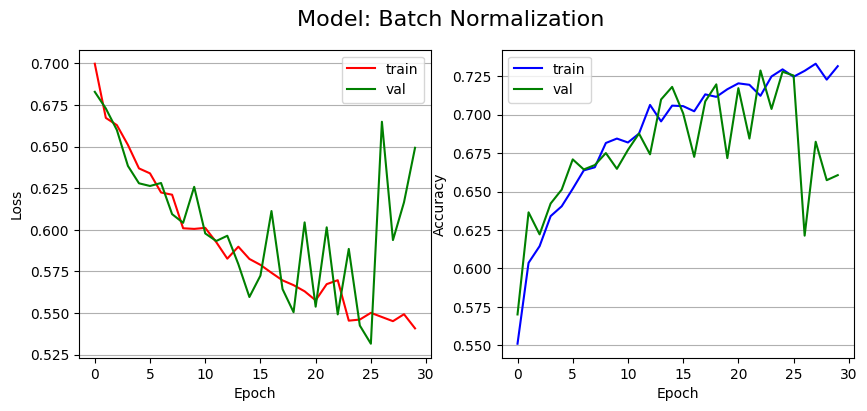

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss
figure = plt.figure(figsize=(10, 4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plotting the accuracy
ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(axis='y')
model_title = ("Model: Batch Normalization ")
plt.suptitle(model_title, fontsize=16)

plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Initialize a Second Sequential model
model2 = Sequential()

# Convolutional Layer 1 with Batch Normalization
model2.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding="same"))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPooling2D(2, 2))

# Convolutional Layer 2 with Batch Normalization
model2.add(Conv2D(16, (3, 3), padding="same"))
model2.add(BatchNormalization())
model2.add(Activation("relu"))

# Flatten Layer
model2.add(Flatten())

# Dense Layers with different number of neurons
model2.add(Dense(64, activation='relu'))  # Change the number of neurons
model2.add(Dense(32, activation='relu'))  # Change the number of neurons

# Dropout Layer
model2.add(Dropout(0.5))  # Add dropout layer

# Output Layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the Model with early stopping
optimizer = Adam(learning_rate=0.001)
loss = BinaryCrossentropy(from_logits=False)
model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Training with early stopping
history = model2.fit(traingen, steps_per_epoch=num_train_samples/50,
                    epochs=30, validation_data=valgen,
                    validation_steps=num_val_samples/50,
                    callbacks=[early_stopping])

Epoch 1/30
195/195 [==============================] - 26s 115ms/step - loss: 0.6998 - accuracy: 0.5511 - val_loss: 0.6830 - val_accuracy: 0.5701
Epoch 2/30
195/195 [==============================] - 22s 115ms/step - loss: 0.6673 - accuracy: 0.6036 - val_loss: 0.6729 - val_accuracy: 0.6365
Epoch 3/30
195/195 [==============================] - 23s 115ms/step - loss: 0.6630 - accuracy: 0.6145 - val_loss: 0.6600 - val_accuracy: 0.6221
Epoch 4/30
195/195 [==============================] - 27s 137ms/step - loss: 0.6511 - accuracy: 0.6340 - val_loss: 0.6384 - val_accuracy: 0.6422
Epoch 5/30
195/195 [==============================] - 26s 136ms/step - loss: 0.6369 - accuracy: 0.6404 - val_loss: 0.6280 - val_accuracy: 0.6512
Epoch 6/30
195/195 [==============================] - 26s 136ms/step - loss: 0.6340 - accuracy: 0.6518 - val_loss: 0.6264 - val_accuracy: 0.6709
Epoch 7/30
195/195 [==============================] - 22s 115ms/step - loss: 0.6225 - accuracy: 0.6637 - val_loss: 0.6282 - val_ac

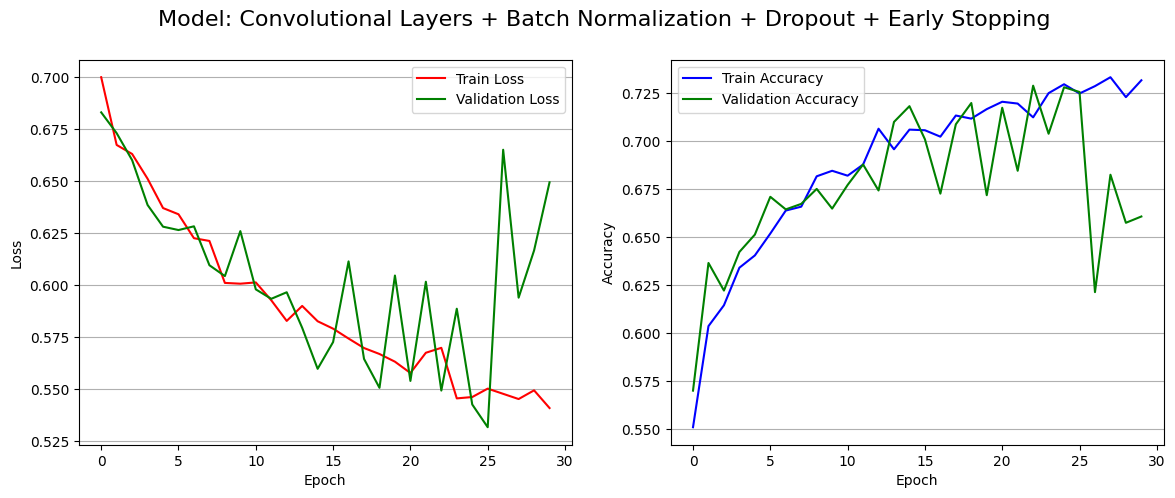

In [ ]:
# Plotting the loss and accuracy
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the loss
ax1.plot(history.history['loss'], 'r', label='Train Loss')
ax1.plot(history.history['val_loss'], 'g', label='Validation Loss')
ax1.legend()
ax1.grid(axis='y')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")

# Plotting the accuracy
ax2.plot(history.history['accuracy'], 'b', label="Train Accuracy")
ax2.plot(history.history['val_accuracy'], 'g', label="Validation Accuracy")
ax2.legend()
ax2.grid(axis='y')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")

# Adding a main title
model_title = "Model: Convolutional Layers + Batch Normalization + Dropout + Early Stopping"
plt.suptitle(model_title, fontsize=16)

# Show the plot
plt.show()


In [ ]:
# Initialize a Third Sequential model
model3 = Sequential()

# Convolutional Layer 1 with Batch Normalization
model3.add(Conv2D(16, (3, 3), input_shape=(32, 32, 3), padding="same"))
model3.add(BatchNormalization())
model3.add(Activation("relu"))
model3.add(MaxPooling2D(2, 2))

# Convolutional Layer 2 with Batch Normalization
model3.add(Conv2D(16, (3, 3), padding="same"))
model3.add(BatchNormalization())
model3.add(Activation("relu"))

# Flatten Layer
model3.add(Flatten())

# Dense Layers with different number of neurons and 'tanh' activation
model3.add(Dense(64, activation='tanh'))  # Change the number of neurons and activation function
model3.add(Dense(32, activation='tanh'))  # Change the number of neurons and activation function

# Dropout Layer
model3.add(Dropout(0.5))  # Add dropout layer

# Output Layer
model3.add(Dense(1, activation='sigmoid'))

# Compile the Model with early stopping
optimizer = Adam(learning_rate=0.001)
loss = BinaryCrossentropy(from_logits=False)
model3.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Training with early stopping
history = model3.fit(traingen, steps_per_epoch=num_train_samples/50,
                    epochs=40, validation_data=valgen,
                    validation_steps=num_val_samples/50,
                    callbacks=[early_stopping])

Epoch 1/40
195/195 [==============================] - 30s 119ms/step - loss: 0.7326 - accuracy: 0.5600 - val_loss: 0.6604 - val_accuracy: 0.6086
Epoch 2/40
195/195 [==============================] - 23s 117ms/step - loss: 0.6887 - accuracy: 0.5885 - val_loss: 0.6578 - val_accuracy: 0.6213
Epoch 3/40
195/195 [==============================] - 23s 120ms/step - loss: 0.6674 - accuracy: 0.6134 - val_loss: 0.6483 - val_accuracy: 0.6283
Epoch 4/40
195/195 [==============================] - 23s 119ms/step - loss: 0.6558 - accuracy: 0.6158 - val_loss: 0.6568 - val_accuracy: 0.6307
Epoch 5/40
195/195 [==============================] - 23s 120ms/step - loss: 0.6539 - accuracy: 0.6161 - val_loss: 0.6928 - val_accuracy: 0.5664
Epoch 6/40
195/195 [==============================] - 23s 119ms/step - loss: 0.6490 - accuracy: 0.6278 - val_loss: 0.6478 - val_accuracy: 0.6221
Epoch 7/40
195/195 [==============================] - 23s 117ms/step - loss: 0.6515 - accuracy: 0.6276 - val_loss: 0.6293 - val_ac

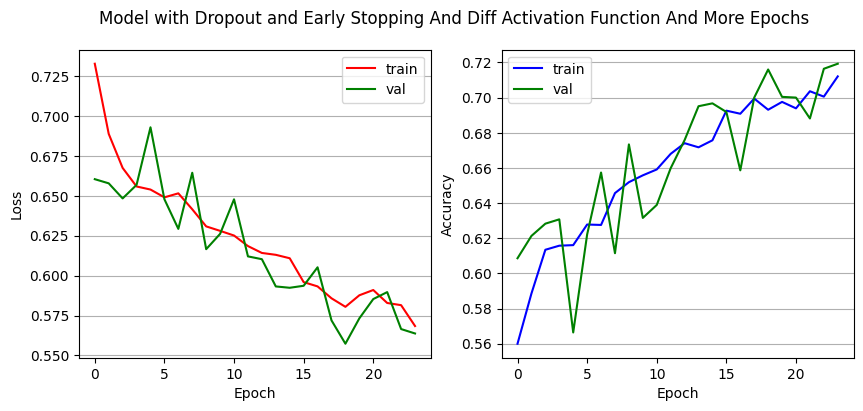

In [ ]:
# Plotting the loss and accuracy
figure = plt.figure(figsize=(10, 4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Plotting the accuracy
ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(axis='y')

# Adding a main title
plt.suptitle("Model with Dropout and Early Stopping And Diff Activation Function And More Epochs")

plt.show()

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5227 entries, 0 to 5226
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_names  5227 non-null   object
dtypes: object(1)
memory usage: 41.0+ KB


In [ ]:
# Initialize an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=[0.8, 1.2],
    shear_range=0.2,
    fill_mode='nearest'
)



In [ ]:
 # Create a test data generator with the specified batch size
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,  # Replace with your actual DataFrame
    directory=image_dir,       # Directory where test images are located
    x_col="image_names",       # Name of the column containing image file names
    y_col=None,                # No labels are provided for testing
    target_size=(32, 32),      # Resize images to 32x32 pixels
    batch_size=32,             # Batch size
    class_mode=None            # No class mode since there are no labels
)


Found 5227 validated image filenames.


In [ ]:
predictions = model3.predict(test_generator)

# Add predictions as a new column to the test DataFrame
test['predicted_values'] = predictions

164/164 [==============================] - 800s 5s/step


In [ ]:
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]

In [ ]:
test['predicted_label'] = predicted_labels

# Save the updated DataFrame with predictions
test.to_csv('/content/drive/MyDrive/Gender_Classification/test_with_prediction.csv', index=False)